In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)

########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

# First let's get the Initial Conditions for the S6 type models within Hunt's batteries

In [166]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
current = .36/5
hours = 50
time_in_seconds = 10#12878#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.38,
    }
)
params.process_model(model)
sim1 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

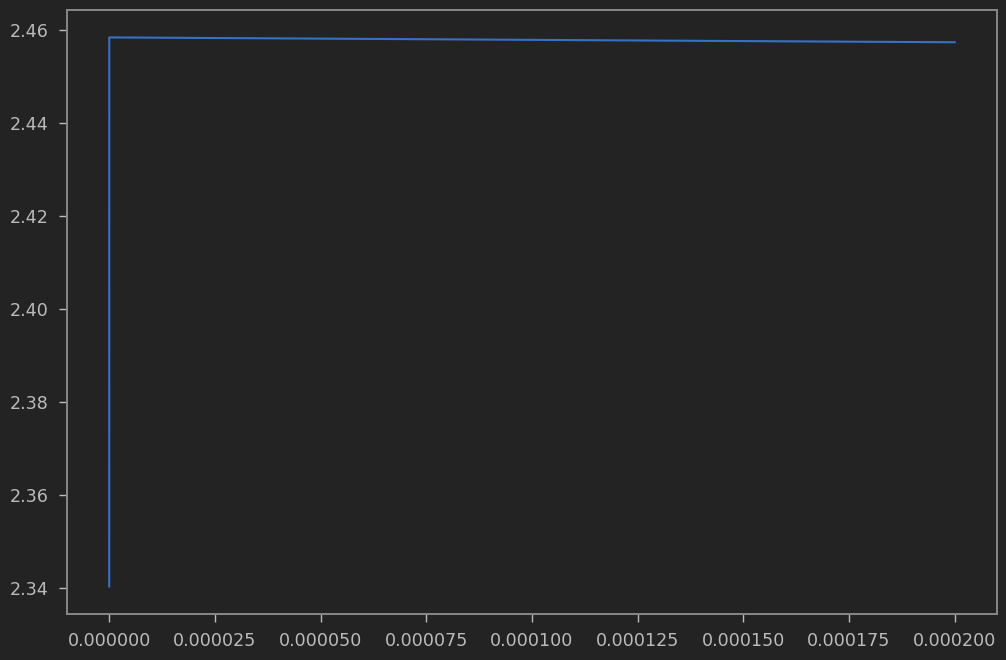

In [167]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
notify

In [168]:
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[-1]
S6_initial = sim1.solution['S6 [g]'].entries[-1]
S4_initial = sim1.solution['S4 [g]'].entries[-1]
S2_initial = sim1.solution['S2 [g]'].entries[-1]
S_initial = sim1.solution['S [g]'].entries[-1]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[-1]
V_initial = sim1.solution['Terminal voltage [V]'].entries[-1]

In [169]:
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
    current = 2.3*.15#/5
    hours = 1
    time_in_seconds = 2100#hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.38,
            "Ambient Temperature [K]": 302.15,
            
            #"Precipitation rate [s-1]": 1
        }
    )
    params.process_model(model)
    sim1 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim1.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

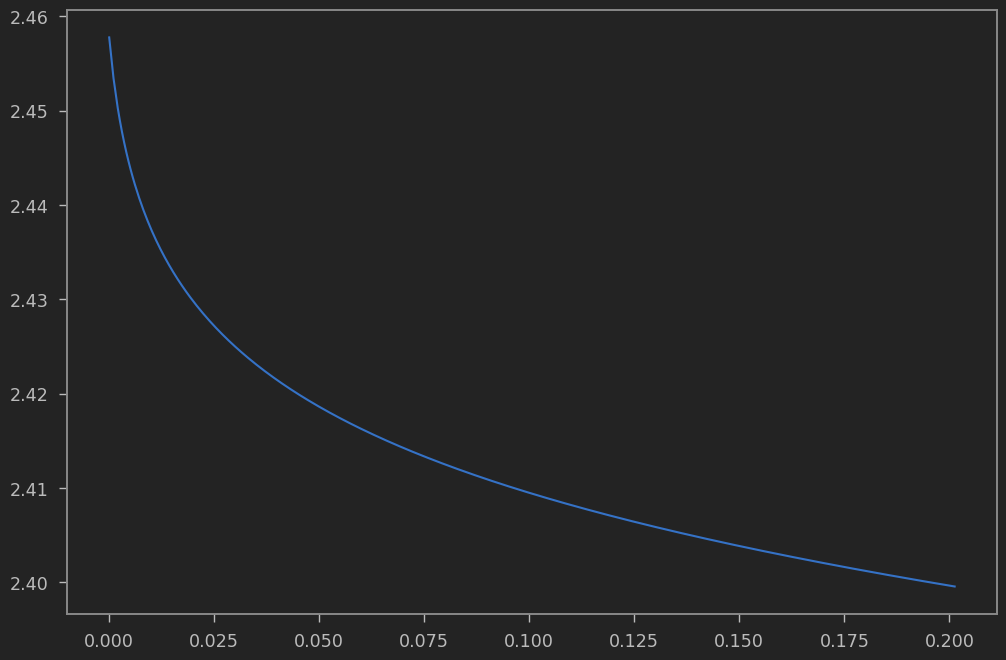

In [170]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
notify

In [171]:
indices = np.where(voltage <= 2.4)
loc = indices[0][0]
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[loc]
S6_initial = sim1.solution['S6 [g]'].entries[loc]
S4_initial = sim1.solution['S4 [g]'].entries[loc]
S2_initial = sim1.solution['S2 [g]'].entries[loc]
S_initial = sim1.solution['S [g]'].entries[loc]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[loc]
V_initial = sim1.solution['Terminal voltage [V]'].entries[loc]

In [172]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
current = 2.3*.15#/5
hours = 10
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        #"Precipitation rate [s-1]": 5,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "Ambient Temperature [K]": 302.15,
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim1 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 100))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 7748.33 and h = 1.3682e-09, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../

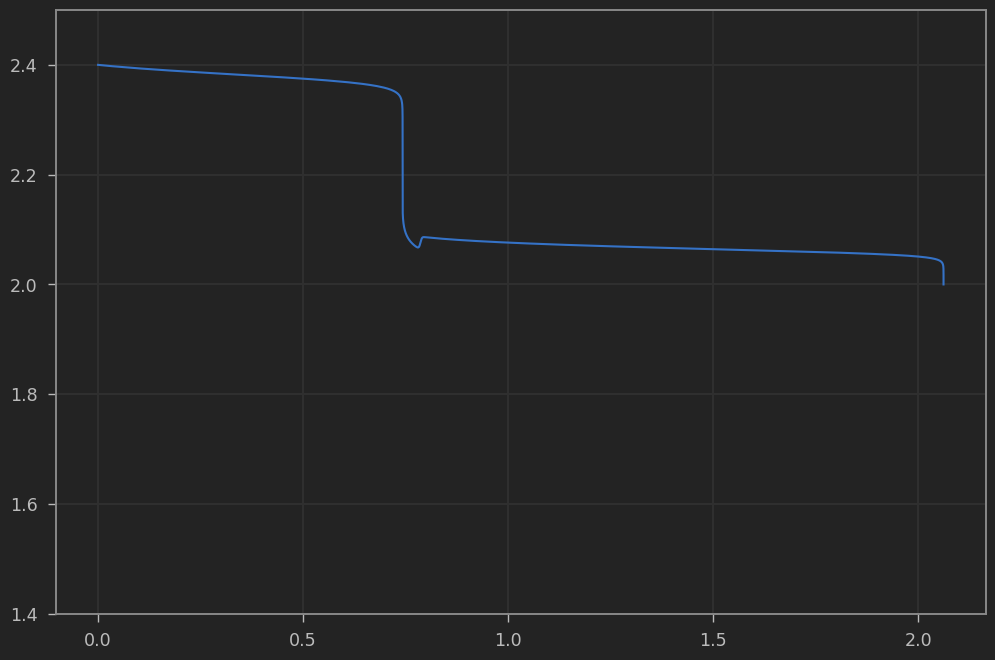

In [173]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [174]:
S8_initial_g = S8_initial
S6_initial_g = S6_initial
S4_initial_g = S4_initial
S2_initial_g = S2_initial
S1_initial_g = S_initial
Sp_initial_g = Sp_initial

# the total active material mass
m_s = S8_initial_g + S6_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S6_initial_frac = S6_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s



In [175]:
# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168*1.5

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = hours*3600

S8_initial_hunt = S8_initial_frac*m_s_hunt
S6_initial_hunt = S6_initial_frac*m_s_hunt
S4_initial_hunt = S4_initial_frac*m_s_hunt
S2_initial_hunt = S2_initial_frac*m_s_hunt
S1_initial_hunt = S1_initial_frac*m_s_hunt
Sp_initial_hunt = Sp_initial_frac*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

In [176]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
current = 2*0.0211
hours = 15
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        #"Precipitation rate [s-1]": 5,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.05,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "Ambient Temperature [K]": 302.15,
        #"Ambient Temperature [K]" : 302
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_S6_2_current = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_S6_2_current.solve(np.linspace(0, time_in_seconds, 1000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 1.60811 and h

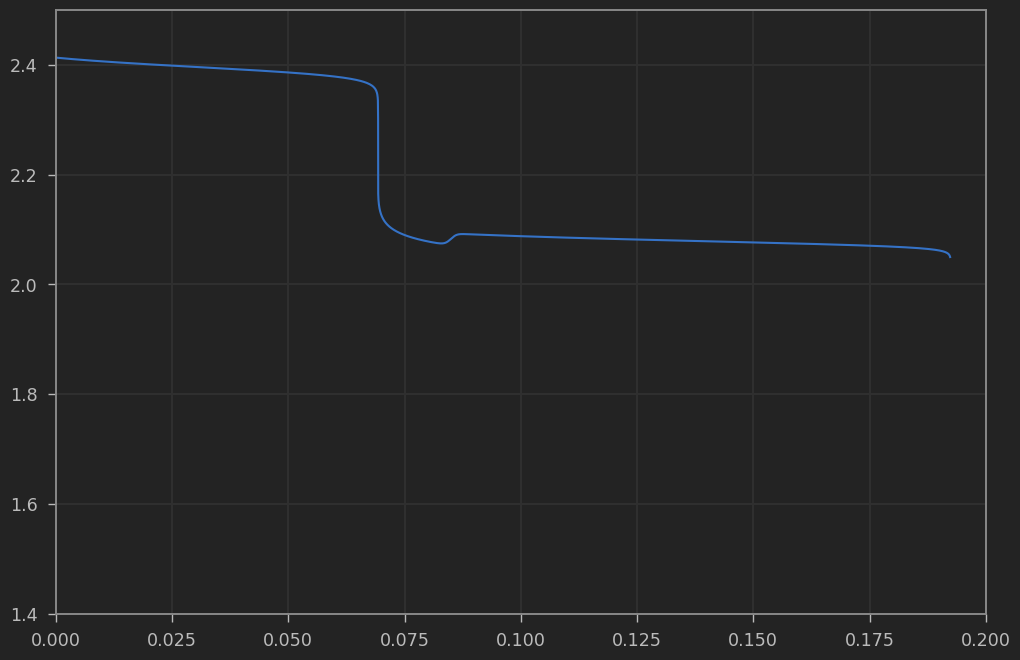

In [177]:
voltage_S6_2_current = sim_hunt_S6_2_current.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_S6_2_current.solution.t/3600,voltage_S6_2_current)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
plt.xlim([0,0.20])
plt.grid(True)
notify

In [178]:
m_s_hunt = .168*2.75

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = hours*3600

S8_initial_hunt = S8_initial_frac*m_s_hunt
S6_initial_hunt = S6_initial_frac*m_s_hunt
S4_initial_hunt = S4_initial_frac*m_s_hunt
S2_initial_hunt = S2_initial_frac*m_s_hunt
S1_initial_hunt = S1_initial_frac*m_s_hunt
Sp_initial_hunt = Sp_initial_frac*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

In [179]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6_3partial()
current = 2*0.0211
hours = 10
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        #"Precipitation rate [s-1]": 5,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.35,
        "Ambient Temperature [K]" : 302.15
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_S6_3_current = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_S6_3_current.solve(np.linspace(0, time_in_seconds, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

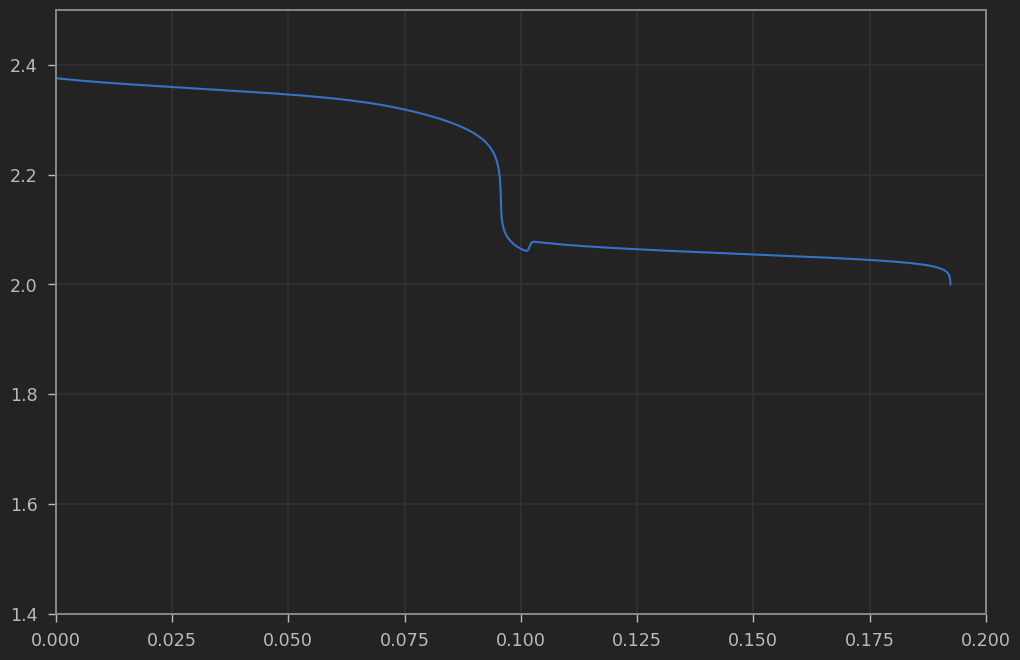

In [180]:
voltage_S6_3_current = sim_hunt_S6_3_current.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_S6_3_current.solution.t/3600,voltage_S6_3_current)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
plt.xlim([0,0.20])
plt.grid(True)
notify

In [181]:
S8_initial_M = 2.6730
S4_initial_M = 0.0128
S2_initial_M = 4.3321e-6
S1_initial_M = 1.6321e-6
Sp_initial_M = 2.7e-06

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168*.465

m_s_M = S8_initial_M + S4_initial_M + S2_initial_M + S1_initial_M + Sp_initial_M

S8_initial_frac_M  = S8_initial_M/m_s_M
S4_initial_frac_M  = S4_initial_M/m_s_M
S2_initial_frac_M  = S2_initial_M/m_s_M
S1_initial_frac_M  = S1_initial_M/m_s_M
Sp_initial_frac_M  = Sp_initial_M/m_s_M

S8_initial_hunt = S8_initial_frac_M*m_s_hunt*2
S4_initial_hunt = S4_initial_frac_M*m_s_hunt
S2_initial_hunt = S2_initial_frac_M*m_s_hunt
S1_initial_hunt = S1_initial_frac_M*m_s_hunt
Sp_initial_hunt = Sp_initial_frac_M*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        #S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

In [182]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016()
current = 2*0.0211
hours = 9
time_in_seconds = 16850#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        #"Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[2] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[3],
        "Initial Condition for S ion [g]": discharge_initial_data[4],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[5],
        #"Precipitation rate [s-1]": 5,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.15,
        "Standard Potential L [V]": 2.15,
        "Standard Potential H [V]": 2.3,
        "Ambient Temperature [K]" : 302.15
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_OG = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_OG.solve(np.linspace(0, time_in_seconds, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

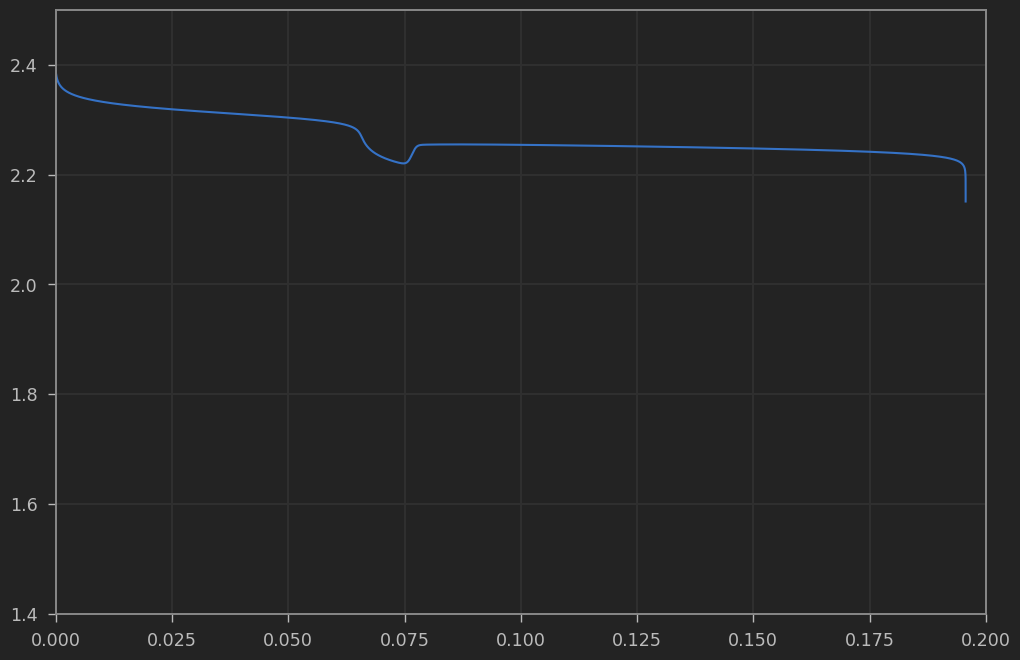

In [183]:
voltage_OG = sim_hunt_OG.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_OG.solution.t/3600,voltage_OG)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
plt.xlim([0,0.20])
plt.grid(True)
notify

In [105]:
S8_initial_M = 2.6730
S4_initial_M = 0.0128
S2_initial_M = 4.3321e-6
S1_initial_M = 1.6321e-6
Sp_initial_M = 2.7e-06

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168*1.6

m_s_M = S8_initial_M + S4_initial_M + S2_initial_M + S1_initial_M + Sp_initial_M

S8_initial_frac_M  = S8_initial_M/m_s_M
S4_initial_frac_M  = S4_initial_M/m_s_M
S2_initial_frac_M  = S2_initial_M/m_s_M
S1_initial_frac_M  = S1_initial_M/m_s_M
Sp_initial_frac_M  = Sp_initial_M/m_s_M

S8_initial_hunt = S8_initial_frac_M*m_s_hunt
S4_initial_hunt = S4_initial_frac_M*m_s_hunt
S2_initial_hunt = S2_initial_frac_M*m_s_hunt
S1_initial_hunt = S1_initial_frac_M*m_s_hunt
Sp_initial_hunt = Sp_initial_frac_M*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        #S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

In [106]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_3_current()
current = 2*0.0211
hours = 15
time_in_seconds = 10400#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        #"Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[2] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[3],
        "Initial Condition for S ion [g]": discharge_initial_data[4],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[5],
        #"Precipitation rate [s-1]": 5,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.05,
        "Standard Potential H [V]": 2.38,
        "Ambient Temperature [K]" : 302.15
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_3_current_quick = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_3_current_quick.solve(np.linspace(0, time_in_seconds, 6000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


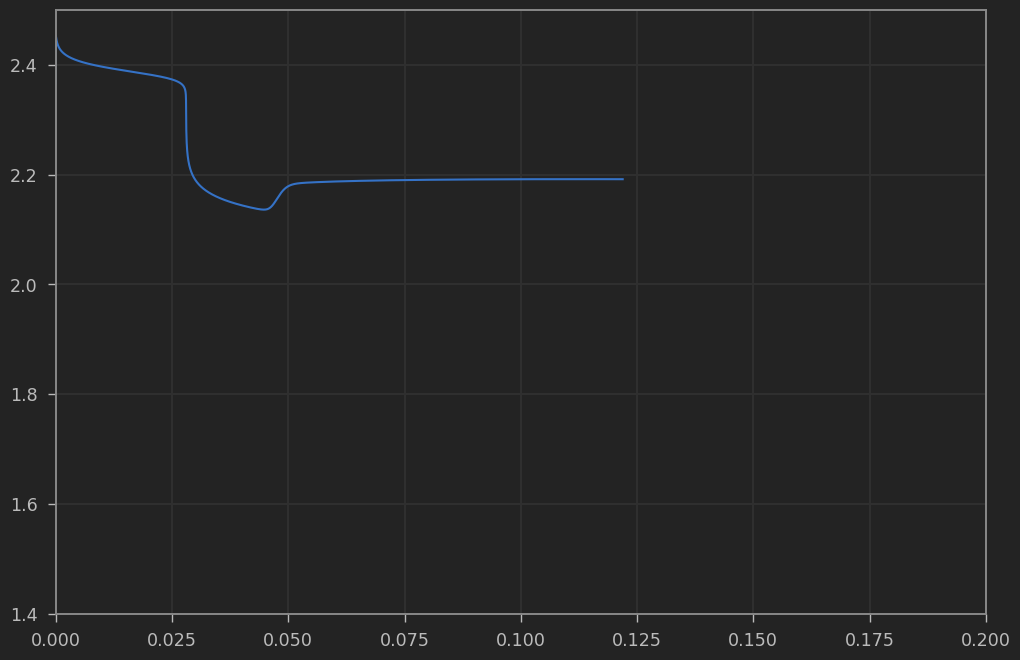

In [107]:
voltage = sim_hunt_3_current_quick.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_3_current_quick.solution.t/3600,voltage)
plt.ylim([1.4,2.5])
plt.xlim([0,0.20])
plt.grid(True)
notify

In [108]:
x = np.where(voltage <= 2.4)

In [109]:
x

(array([   0,  395,  396, ..., 5997, 5998, 5999]),)

In [110]:
loc = x[0][1]

In [111]:
#loc = 8731
factor = 1
S8_initial_3_hunt = sim_hunt_3_current_quick.solution['S8 [g]'].entries[loc]*factor
S4_initial_3_hunt = sim_hunt_3_current_quick.solution['S4 [g]'].entries[loc]*factor
S2_initial_3_hunt = sim_hunt_3_current_quick.solution['S2 [g]'].entries[loc]*factor
S_initial_3_hunt = sim_hunt_3_current_quick.solution['S [g]'].entries[loc]*factor
Sp_initial_3_hunt = sim_hunt_3_current_quick.solution["Precipitated Sulfur [g]"].entries[loc]*factor
V_initial_3_hunt = sim_hunt_3_current_quick.solution['Terminal voltage [V]'].entries[loc]

In [112]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_3_current()
current = 2*0.0211
hours = 15
time_in_seconds = 18000#1960#17000#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": S8_initial_3_hunt ,
        #"Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": S4_initial_3_hunt,
        "Initial Condition for S2 ion [g]": S2_initial_3_hunt,
        "Initial Condition for S ion [g]": S_initial_3_hunt,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_3_hunt,
        #"Precipitation rate [s-1]": 100,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        #'Active reaction area per cell [m2]': 960,
        #'Exchange current density L [A.m-2]': 15,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.05,
        "Standard Potential H [V]": 2.38,
        "Ambient Temperature [K]" : 302.15,
        #"S saturation mass [g]": 1e-3,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_3_current = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_3_current.solve(np.linspace(0, time_in_seconds, 5000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


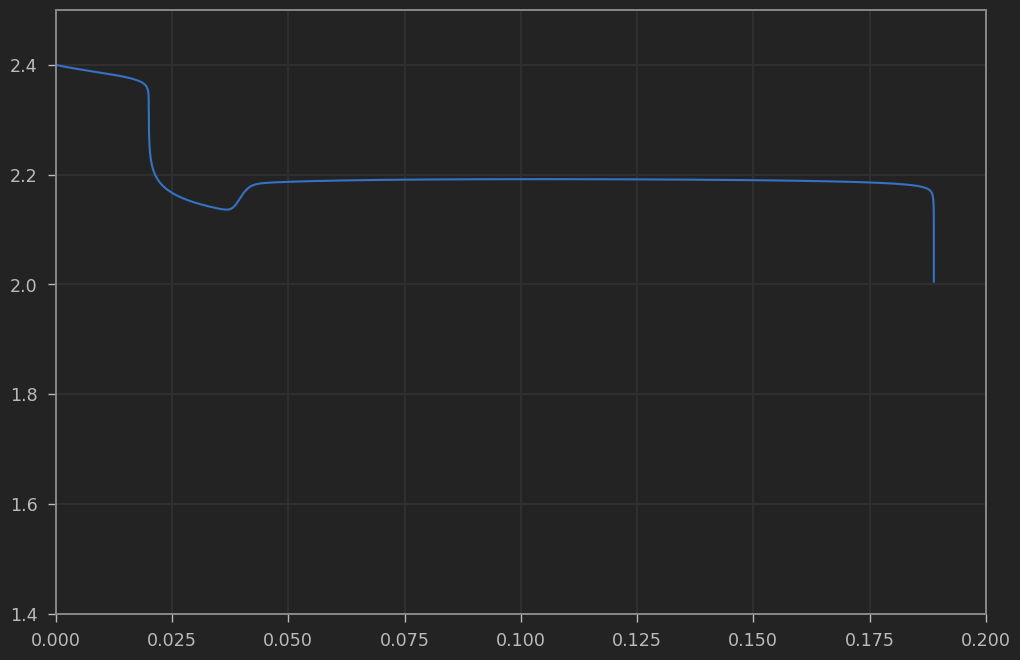

In [113]:
voltage = sim_hunt_3_current.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_3_current.solution.t/3600,voltage)
plt.ylim([1.4,2.5])
plt.xlim([0,0.20])
plt.grid(True)
notify

In [114]:
S8_initial_g = 2.6565990721396795
S6_initial_g = 0.03308746536461487
S4_initial_g = 0.013008078277994115
S2_initial_g = 2.8449317677625998e-08
S1_initial_g = 4.404388467562549e-12
Sp_initial_g = 2.6636551382083317e-06

# the total active material mass
m_s = S8_initial_g + S6_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S6_initial_frac = S6_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168*1.5

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = hours*3600

S8_initial_hunt = S8_initial_frac*m_s_hunt*3
S6_initial_hunt = S6_initial_frac*m_s_hunt
S4_initial_hunt = S4_initial_frac*m_s_hunt
S2_initial_hunt = S2_initial_frac*m_s_hunt
S1_initial_hunt = S1_initial_frac*m_s_hunt
Sp_initial_hunt = Sp_initial_frac*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

model = pybamm.lithium_sulfur.Cornish_pseudospatial()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = 2*0.0211
hours = 15
time_in_seconds = 21000#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": discharge_initial_data[1],
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3],
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        "Initial Condition for Terminal Voltage [V]": 2.4,#V_initial,
        #"Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "gamma": 25000,
        "kappa" : 15,
        #"S saturation mass [g]": 1e-6,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish_pseudospatial = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish_pseudospatial.solve(np.linspace(0, time_in_seconds, 100000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

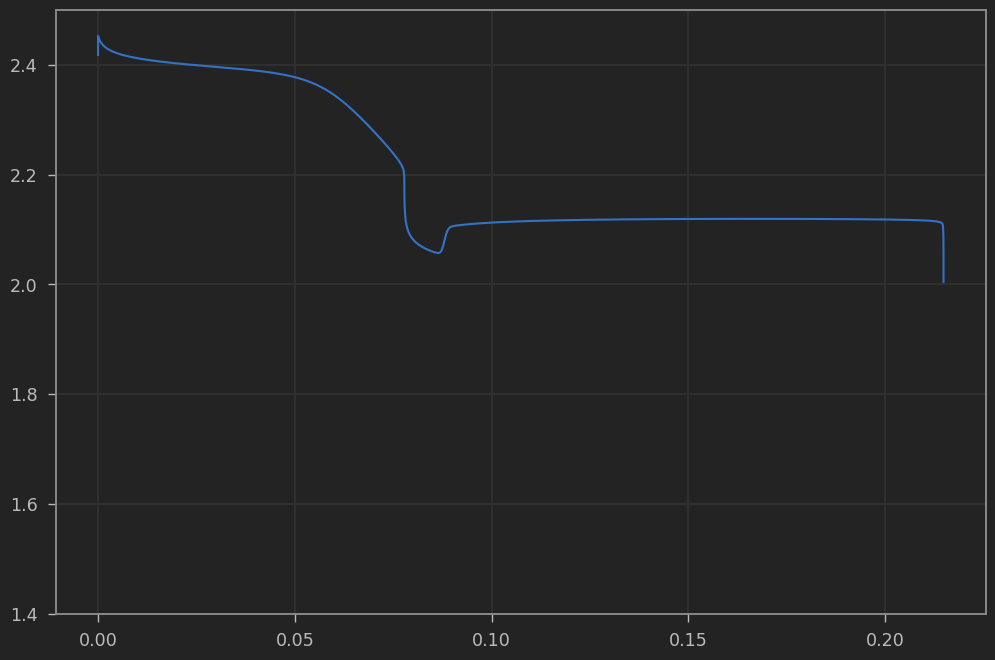

In [115]:
voltage_cornish_pseudospatial = sim_cornish_pseudospatial.solution['Terminal voltage [V]'].entries
capacity_cornish_pseudospatial = abs(current)*sim_cornish_pseudospatial.solution.t/3600
plt.plot(capacity_cornish_pseudospatial,voltage_cornish_pseudospatial)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [154]:
S8_initial_g = 2.6565990721396795
S6_initial_g = 0.03308746536461487
S4_initial_g = 0.013008078277994115
S2_initial_g = 2.8449317677625998e-08
S1_initial_g = 4.404388467562549e-12
Sp_initial_g = 2.6636551382083317e-06

# the total active material mass
m_s = S8_initial_g + S6_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S6_initial_frac = S6_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168*1.4

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = 10#hours*3600

S8_initial_hunt = S8_initial_frac*m_s_hunt*3
S6_initial_hunt = S6_initial_frac*m_s_hunt
S4_initial_hunt = S4_initial_frac*m_s_hunt
S2_initial_hunt = S2_initial_frac*m_s_hunt
S1_initial_hunt = S1_initial_frac*m_s_hunt
Sp_initial_hunt = Sp_initial_frac*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

model = pybamm.lithium_sulfur.Cornish()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = 2*0.0211
hours = 15
time_in_seconds = 1440#18310#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": discharge_initial_data[1],
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3],
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        "Initial Condition for Terminal Voltage [V]": 2.4,#V_initial,
        #"Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.15,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "gamma": 0,
        "kappa" : 0,
        #"S saturation mass [g]": 1e-6,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish_quick = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish_quick.solve(np.linspace(0, time_in_seconds, 1000))

The linesearch algorithm failed with too small a step.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cp

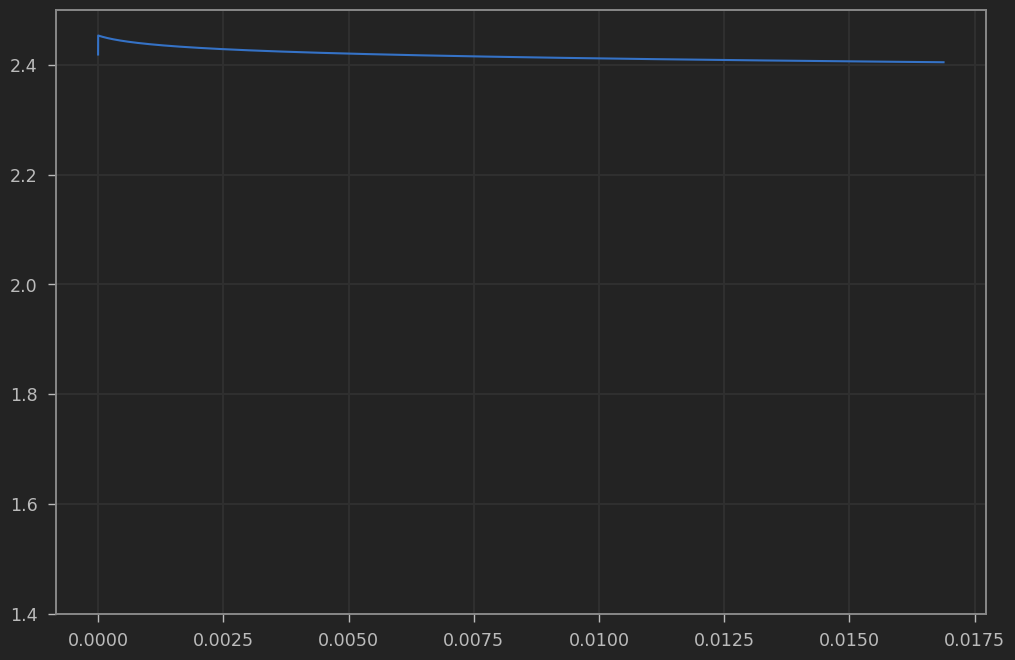

In [155]:
voltage_cornish_quick = sim_cornish_quick.solution['Terminal voltage [V]'].entries
capacity_cornish_quick = abs(current)*sim_cornish_quick.solution.t/3600
plt.plot(capacity_cornish_quick,voltage_cornish_quick)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [162]:
x = np.where(voltage_cornish <= 2.4)
loc = -1#x[0][0]
S8_initial_cornish = sim_cornish_quick.solution['S8 [g]'].entries[loc]
S6_initial_cornish = sim_cornish_quick.solution['S6 [g]'].entries[loc]
S4_initial_cornish = sim_cornish_quick.solution['S4 [g]'].entries[loc]
S2_initial_cornish = sim_cornish_quick.solution['S2 [g]'].entries[loc]
S_initial_cornish = sim_cornish_quick.solution['S [g]'].entries[loc]
Sp_initial_cornish = sim_cornish_quick.solution["Precipitated Sulfur [g]"].entries[loc]
V_initial_cornish = sim_cornish_quick.solution['Terminal voltage [V]'].entries[loc]



model = pybamm.lithium_sulfur.Cornish()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = 2*0.0211
hours = 15
time_in_seconds = 40000#18310#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial_cornish,
        "Initial Condition for S6 ion [g]": S6_initial_cornish,
        "Initial Condition for S4 ion [g]": S4_initial_cornish,
        "Initial Condition for S2 ion [g]": S2_initial_cornish,
        "Initial Condition for S ion [g]": S_initial_cornish,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_cornish,
        "Initial Condition for Terminal Voltage [V]": 2.4,#V_initial,
        #"Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "gamma": 0,
        "kappa" : 0,
        #"S saturation mass [g]": 1e-6,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish.solve(np.linspace(0, time_in_seconds, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

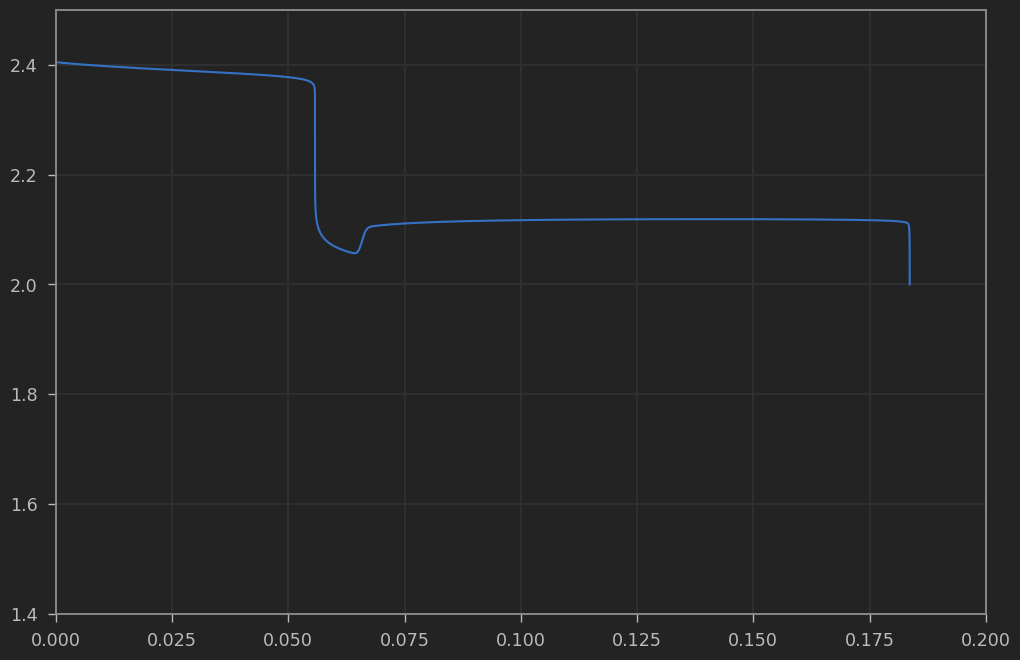

In [164]:
voltage_cornish = sim_cornish.solution['Terminal voltage [V]'].entries
capacity_cornish = abs(current)*sim_cornish.solution.t/3600
plt.plot(capacity_cornish,voltage_cornish)
plt.ylim([1.4,2.5])
plt.xlim([0,0.2])
plt.grid(True)
notify

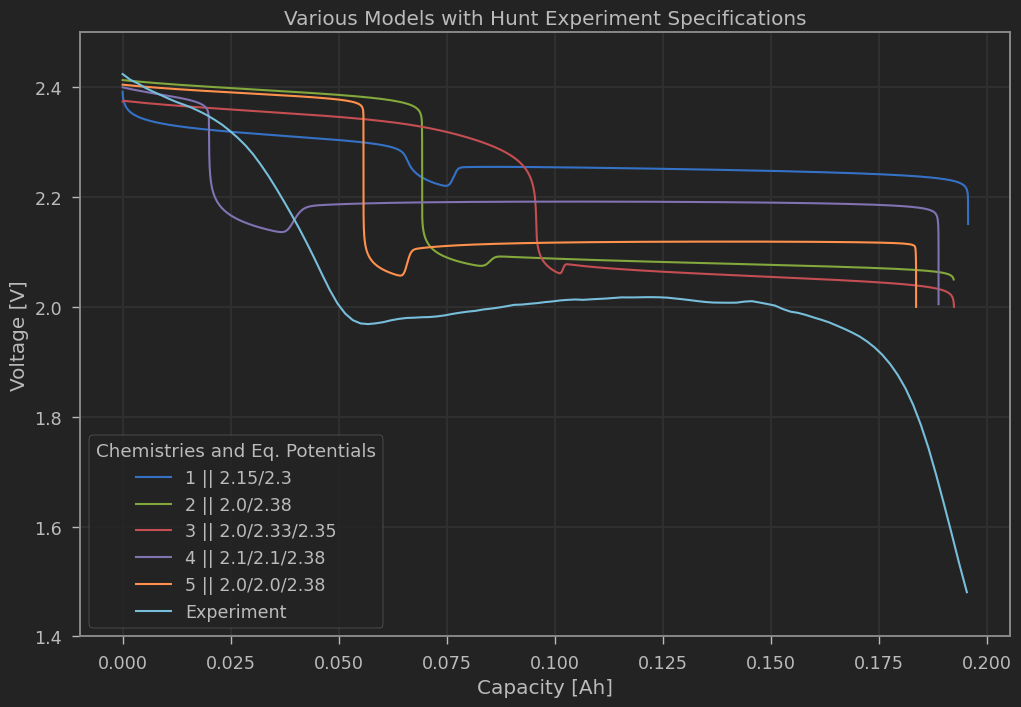

In [184]:
voltage_OG = sim_hunt_OG.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_OG.solution.t/3600,voltage_OG)

voltage_S6_2_current = sim_hunt_S6_2_current.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_S6_2_current.solution.t/3600,voltage_S6_2_current)

voltage_S6_3_current = sim_hunt_S6_3_current.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_S6_3_current.solution.t/3600,voltage_S6_3_current)

voltage = sim_hunt_3_current.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_3_current.solution.t/3600,voltage)

plt.plot(capacity_cornish,voltage_cornish)

plt.ylim([1.4,2.5])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.title('Various Models with Hunt Experiment Specifications')
plt.grid(True)

# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

temp_list = list(discharge_data.keys())

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])


plt.legend(['1 || 2.15/2.3',
            '2 || 2.0/2.38',
            '3 || 2.0/2.33/2.35',
            '4 || 2.1/2.1/2.38',
            '5 || 2.0/2.0/2.38',
            'Experiment'], title='Chemistries and Eq. Potentials')


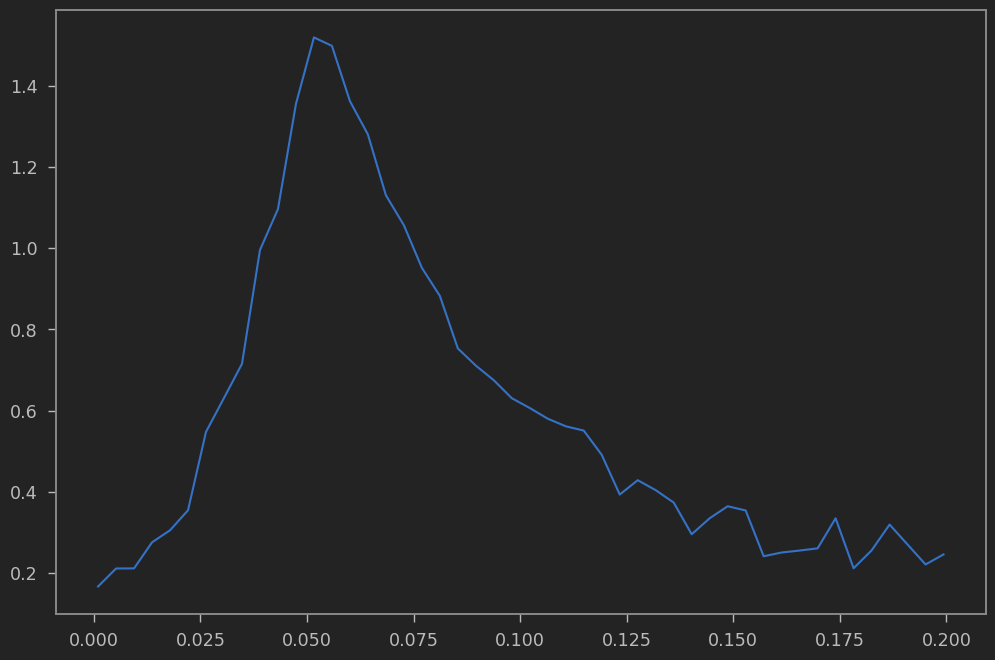

In [185]:
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/red_data'
infile = open(filename,'rb')
res_data = pickle.load(infile)
infile.close()

res_discharge_data = res_data['discharge']
res_charge_data = res_data['charge']

plt.plot(res_discharge_data['30'][0],res_discharge_data['30'][1])

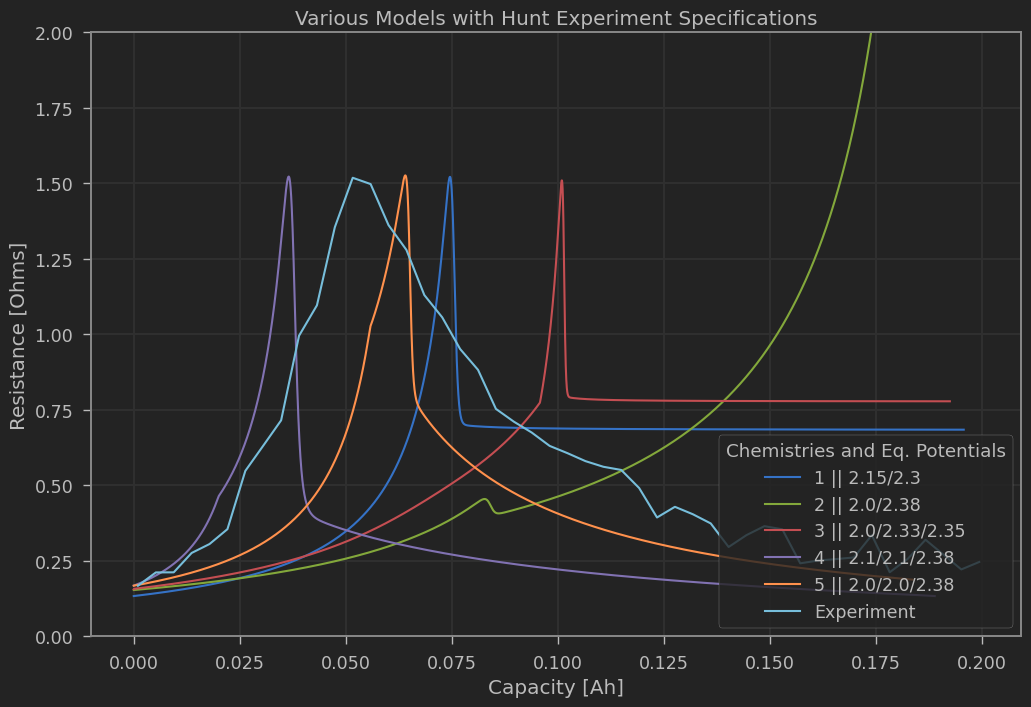

In [410]:
plt.rcParams['figure.figsize'] = [12, 8]
sigma_0 = 2e-3
l =  4e-5
A = 0.15

S4 = sim_hunt_OG.solution['S4 [g]'].entries
S2 = sim_hunt_OG.solution['S2 [g]'].entries
S1 = sim_hunt_OG.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4
b = 4.12e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(abs(current)*sim_hunt_OG.solution.t/3600,R)


S6 = sim_hunt_S6_2_current.solution['S6 [g]'].entries
S4 = sim_hunt_S6_2_current.solution['S4 [g]'].entries
S2 = sim_hunt_S6_2_current.solution['S2 [g]'].entries
S1 = sim_hunt_S6_2_current.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
b = 2.35e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(abs(current)*sim_hunt_S6_2_current.solution.t/3600,R)

S6 = sim_hunt_S6_3_current.solution['S6 [g]'].entries
S4 = sim_hunt_S6_3_current.solution['S4 [g]'].entries
S2 = sim_hunt_S6_3_current.solution['S2 [g]'].entries
S1 = sim_hunt_S6_3_current.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
b = 1.432e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(abs(current)*sim_hunt_S6_3_current.solution.t/3600,R)

#S6 = sim_hunt_OG.solution['S6 [g]'].entries

S4 = sim_hunt_3_current.solution['S4 [g]'].entries
S2 = sim_hunt_3_current.solution['S2 [g]'].entries
S1 = sim_hunt_3_current.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4
b = 2.12e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(abs(current)*sim_hunt_3_current.solution.t/3600,R)


S6 = sim_cornish.solution['S6 [g]'].entries
S4 = sim_cornish.solution['S4 [g]'].entries
S2 = sim_cornish.solution['S2 [g]'].entries
S1 = sim_cornish.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
b = 1.33e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity_cornish,R)

plt.plot(res_discharge_data['30'][0],res_discharge_data['30'][1])

plt.legend(['1 || 2.15/2.3',
            '2 || 2.0/2.38',
            '3 || 2.0/2.33/2.35',
            '4 || 2.1/2.1/2.38',
            '5 || 2.0/2.0/2.38',
           'Experiment'], title='Chemistries and Eq. Potentials', loc = 4)


plt.xlabel('Capacity [Ah]')
plt.ylabel('Resistance [Ohms]')
plt.title('Various Models with Hunt Experiment Specifications')
plt.ylim([0,2])
plt.grid(True)

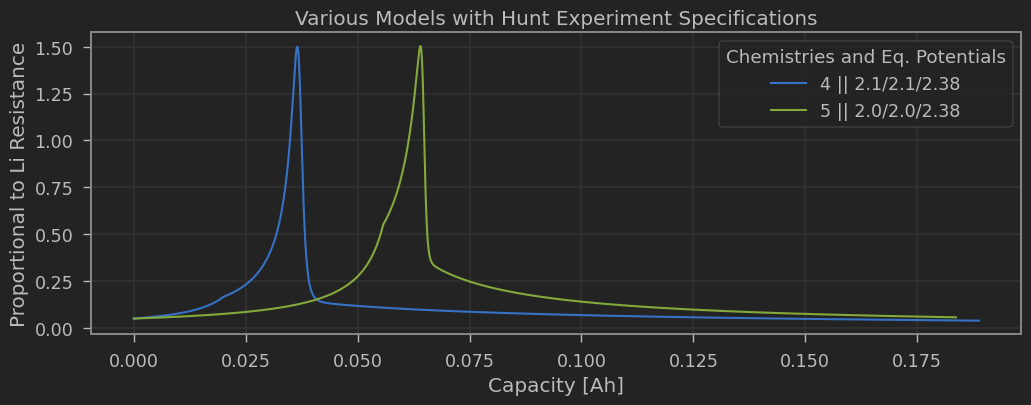

In [314]:
plt.rcParams['figure.figsize'] = [12, 4]
S4 = sim_hunt_3_current.solution['S4 [g]'].entries
S2 = sim_hunt_3_current.solution['S2 [g]'].entries
S1 = sim_hunt_3_current.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4
b = 2.2615e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(abs(current)*sim_hunt_3_current.solution.t/3600,R)


S6 = sim_cornish.solution['S6 [g]'].entries
S4 = sim_cornish.solution['S4 [g]'].entries
S2 = sim_cornish.solution['S2 [g]'].entries
S1 = sim_cornish.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
b = 1.4185e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity_cornish,R)

plt.legend([
            '4 || 2.1/2.1/2.38',
            '5 || 2.0/2.0/2.38'], title='Chemistries and Eq. Potentials')


plt.xlabel('Capacity [Ah]')
plt.ylabel('Proportional to Li Resistance')
plt.title('Various Models with Hunt Experiment Specifications')
plt.grid(True)


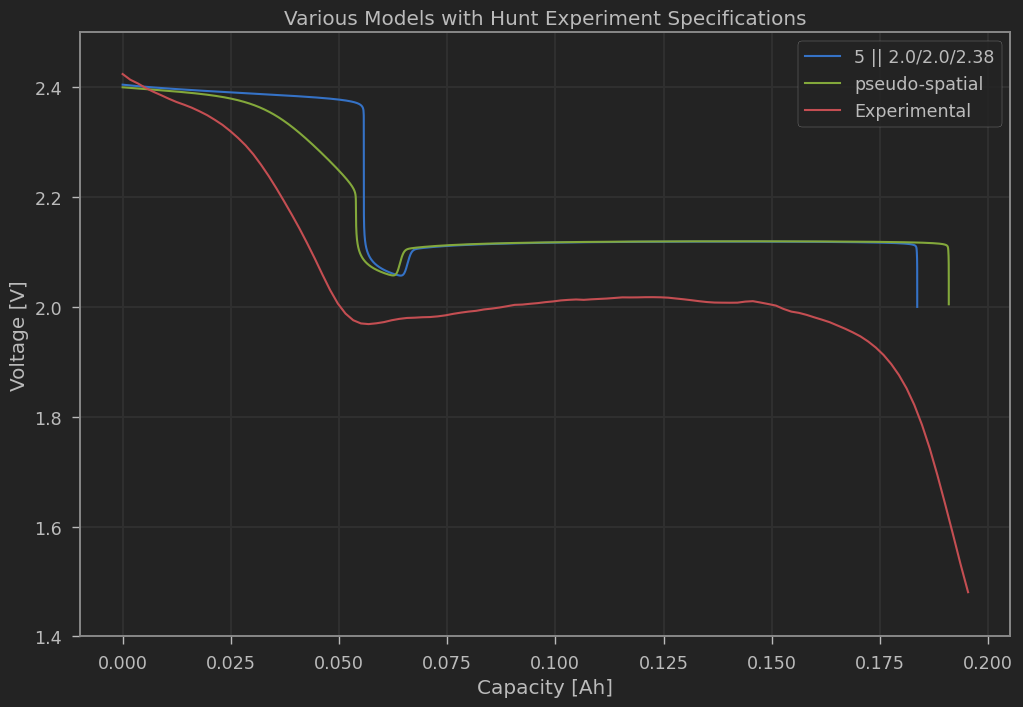

In [318]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(capacity_cornish,voltage_cornish)


x = np.where(voltage_cornish_pseudospatial <= 2.4)
loc = x[0][0]
plt.plot(capacity_cornish_pseudospatial[loc:]-capacity_cornish_pseudospatial[loc],voltage_cornish_pseudospatial[loc:])

plt.ylim([1.4,2.5])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.title('Various Models with Hunt Experiment Specifications')
plt.grid(True)

# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

temp_list = list(discharge_data.keys())

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])
plt.legend(['5 || 2.0/2.0/2.38',
           'pseudo-spatial',
           'Experimental'])

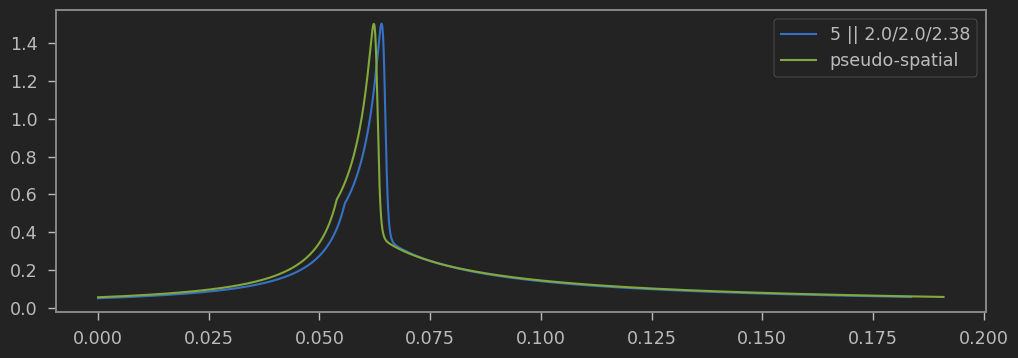

In [362]:
plt.rcParams['figure.figsize'] = [12, 4]
S6 = sim_cornish.solution['S6 [g]'].entries
S4 = sim_cornish.solution['S4 [g]'].entries
S2 = sim_cornish.solution['S2 [g]'].entries
S1 = sim_cornish.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
b = 1.4185e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity_cornish,R)

S6 = sim_cornish_pseudospatial.solution['S6 [g]'].entries[loc:]
S4 = sim_cornish_pseudospatial.solution['S4 [g]'].entries[loc:]
S2 = sim_cornish_pseudospatial.solution['S2 [g]'].entries[loc:]
S1 = sim_cornish_pseudospatial.solution['S [g]'].entries[loc:]
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
b = 1.3275e-2
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity_cornish_pseudospatial[loc:]-capacity_cornish_pseudospatial[loc],R)

plt.legend(['5 || 2.0/2.0/2.38',
           'pseudo-spatial'])

In [408]:
S8_initial_g = 2.6565990721396795
S6_initial_g = 0.03308746536461487
S4_initial_g = 0.013008078277994115
S2_initial_g = 2.8449317677625998e-08
S1_initial_g = 4.404388467562549e-12
Sp_initial_g = 2.6636551382083317e-06

# the total active material mass
m_s = S8_initial_g + S6_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S6_initial_frac = S6_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168*1.4

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = hours*3600

S8_initial_hunt = S8_initial_frac*m_s_hunt*3
S6_initial_hunt = S6_initial_frac*m_s_hunt
S4_initial_hunt = S4_initial_frac*m_s_hunt
S2_initial_hunt = S2_initial_frac*m_s_hunt
S1_initial_hunt = S1_initial_frac*m_s_hunt
Sp_initial_hunt = Sp_initial_frac*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

model = pybamm.lithium_sulfur.Cornish_pseudospatial()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = 2*0.0211
hours = 15
time_in_seconds = 20000#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial_cornish,
        "Initial Condition for S6 ion [g]": S6_initial_cornish,
        "Initial Condition for S4 ion [g]": S4_initial_cornish,
        "Initial Condition for S2 ion [g]": S2_initial_cornish,
        "Initial Condition for S ion [g]": S_initial_cornish,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_cornish,
        "Initial Condition for Terminal Voltage [V]": 2.4,#V_initial,
        #"Precipitation rate [s-1]": 50,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "gamma": 25000,
        "kappa" : 15,
        #"S saturation mass [g]": 1e-6,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish_pseudospatial_ks = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish_pseudospatial_ks.solve(np.linspace(0, time_in_seconds, 1000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

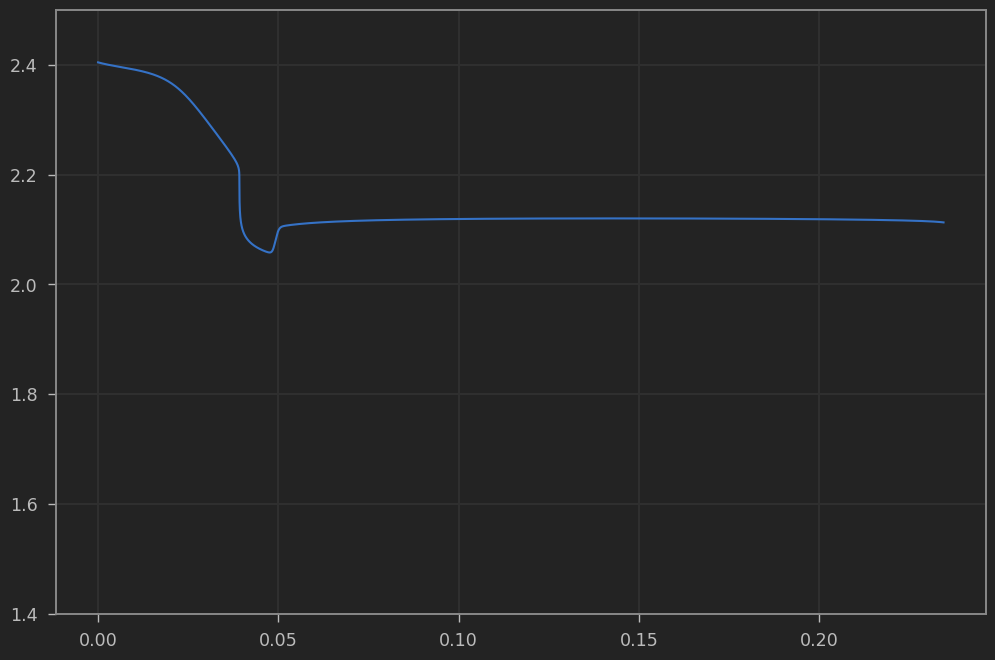

In [409]:
voltage_cornish_pseudospatial_ks = sim_cornish_pseudospatial_ks.solution['Terminal voltage [V]'].entries
capacity_cornish_pseudospatial_ks = abs(current)*sim_cornish_pseudospatial_ks.solution.t/3600
plt.plot(capacity_cornish_pseudospatial_ks,voltage_cornish_pseudospatial_ks)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(capacity_cornish,voltage_cornish)
plt.plot(capacity_cornish_pseudospatial,voltage_cornish_pseudospatial)
plt.plot(capacity_cornish_pseudospatial_ks,voltage_cornish_pseudospatial_ks)

plt.ylim([1.4,2.5])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.title('Various Models with Hunt Experiment Specifications')
plt.grid(True)

# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

temp_list = list(discharge_data.keys())

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])

plt.legend(['5 || 2.0/2.0/2.38',
           'sigmoid oconcentration',
            'sigmoid concentration with shuttle',
           'Experimental'])

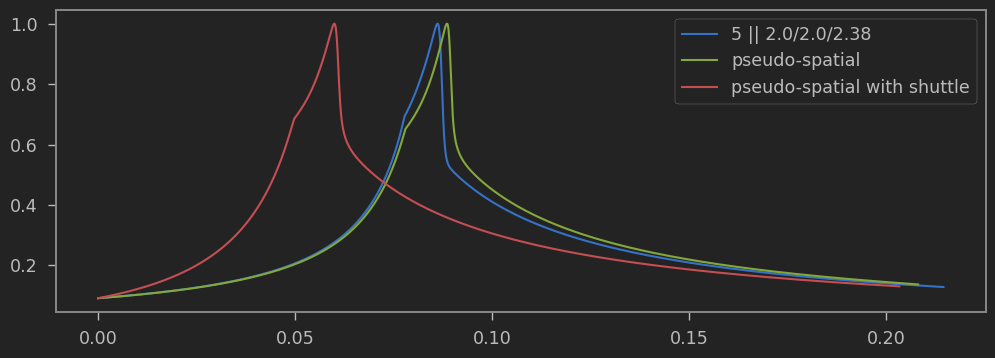

In [65]:
plt.rcParams['figure.figsize'] = [12, 4]
S6 = sim_cornish.solution['S6 [g]'].entries
S4 = sim_cornish.solution['S4 [g]'].entries
S2 = sim_cornish.solution['S2 [g]'].entries
S1 = sim_cornish.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
peak = max(Li)
R = 1/(peak*1.1 - Li)
R = R/max(R)
plt.plot(capacity_cornish,R)

S6 = sim_cornish_pseudospatial.solution['S6 [g]'].entries
S4 = sim_cornish_pseudospatial.solution['S4 [g]'].entries
S2 = sim_cornish_pseudospatial.solution['S2 [g]'].entries
S1 = sim_cornish_pseudospatial.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
peak = max(Li)
R = 1/(peak*1.1 - Li)
R = R/max(R)
plt.plot(capacity_cornish_pseudospatial,R)

S6 = sim_cornish_pseudospatial_ks.solution['S6 [g]'].entries
S4 = sim_cornish_pseudospatial_ks.solution['S4 [g]'].entries
S2 = sim_cornish_pseudospatial_ks.solution['S2 [g]'].entries
S1 = sim_cornish_pseudospatial_ks.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
peak = max(Li)
R = 1/(peak*1.1 - Li)
R = R/max(R)
plt.plot(capacity_cornish_pseudospatial_ks,R)
plt.legend(['5 || 2.0/2.0/2.38',
           'pseudo-spatial',
            'pseudo-spatial with shuttle',
           'Experimental'])

In [81]:
S8_initial = sim_cornish.solution['S8 [g]'].entries[-1]
S6_initial = sim_cornish.solution['S6 [g]'].entries[-1]
S4_initial = sim_cornish.solution['S4 [g]'].entries[-1]
S2_initial = sim_cornish.solution['S2 [g]'].entries[-1]
S1_initial = sim_cornish.solution['S [g]'].entries[-1]
Sp_initial = sim_cornish.solution['Precipitated Sulfur [g]'].entries[-1]
V_initial = sim_cornish.solution['Terminal voltage [V]'].entries[-1]

In [128]:
model = pybamm.lithium_sulfur.Cornish_pseudospatial()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = -0.0211
hours = 15
time_in_seconds = 33000#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,#V_initial,
        #"Precipitation rate [s-1]": 50,
        "Shuttle rate coefficient during charge [s-1]": 0.00002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        #"gamma": 25000,
        #"kappa" : 15,
        #"S saturation mass [g]": 1e-6,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish_charge = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish_charge.solve(np.linspace(0, time_in_seconds, 1000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

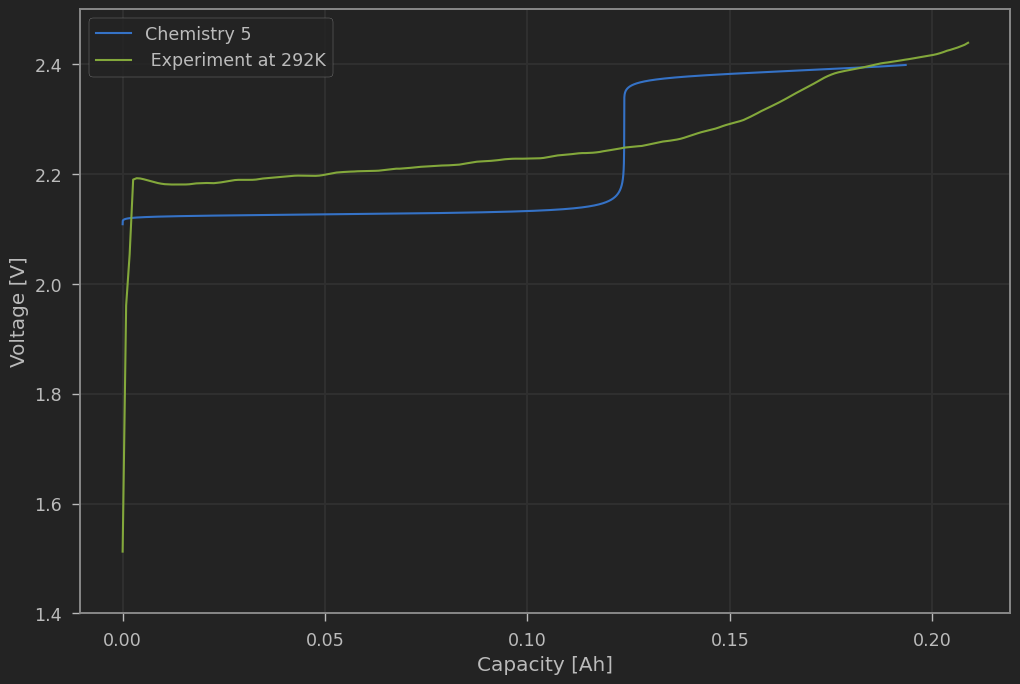

In [129]:
plt.rcParams['figure.figsize'] = [12, 8]
voltage_cornish_charge = sim_cornish_charge.solution['Terminal voltage [V]'].entries
capacity_cornish_charge = abs(current)*sim_cornish_charge.solution.t/3600
plt.plot(capacity_cornish_charge,voltage_cornish_charge)
plt.plot(charge_data['30']['capacity'],charge_data['30']['internal voltage'])
plt.ylim([1.4,2.5])
plt.legend(["Chemistry 5", " Experiment at 292K"])
plt.xlabel("Capacity [Ah]")
plt.ylabel("Voltage [V]")
plt.grid(True)
notify

(0.0, 1.5)

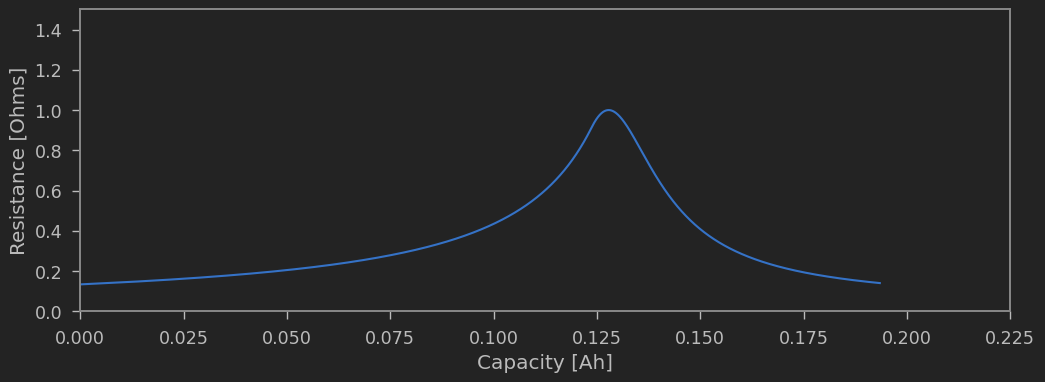

In [130]:
plt.rcParams['figure.figsize'] = [12, 4]

S6 = sim_cornish_charge.solution['S6 [g]'].entries
S4 = sim_cornish_charge.solution['S4 [g]'].entries
S2 = sim_cornish_charge.solution['S2 [g]'].entries
S1 = sim_cornish_charge.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
peak = max(Li)
R = 1/(peak*1.1 - Li)
R = R/max(R)
plt.plot(capacity_cornish_charge,R)
plt.ylabel("Resistance [Ohms]")
plt.xlabel("Capacity [Ah]")
plt.xlim([0,0.225])
plt.ylim([0,1.5])

In [131]:
model = pybamm.lithium_sulfur.Cornish_pseudospatial()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = -0.0211
hours = 15
time_in_seconds = 33000#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,#V_initial,
        #"Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "Ambient Temperature [K]" : 292.15,
        #"gamma": 25000,
        #"kappa" : 15,
        #"S saturation mass [g]": 1e-6,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish_charge_292 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish_charge_292.solve(np.linspace(0, time_in_seconds, 1000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [132]:
model = pybamm.lithium_sulfur.Cornish_pseudospatial()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = -0.0211
hours = 15
time_in_seconds = 33000#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,#V_initial,
        #"Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "Ambient Temperature [K]" : 302.15,
        #"gamma": 25000,
        #"kappa" : 15,
        #"S saturation mass [g]": 1e-6,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish_charge_302 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish_charge_302.solve(np.linspace(0, time_in_seconds, 1000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [133]:
model = pybamm.lithium_sulfur.Cornish_pseudospatial()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = -0.0211
hours = 15
time_in_seconds = 33000#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,#V_initial,
        #"Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "Ambient Temperature [K]" : 312.15,
        #"gamma": 25000,
        #"kappa" : 15,
        #"S saturation mass [g]": 1e-6,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish_charge_312 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish_charge_312.solve(np.linspace(0, time_in_seconds, 1000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

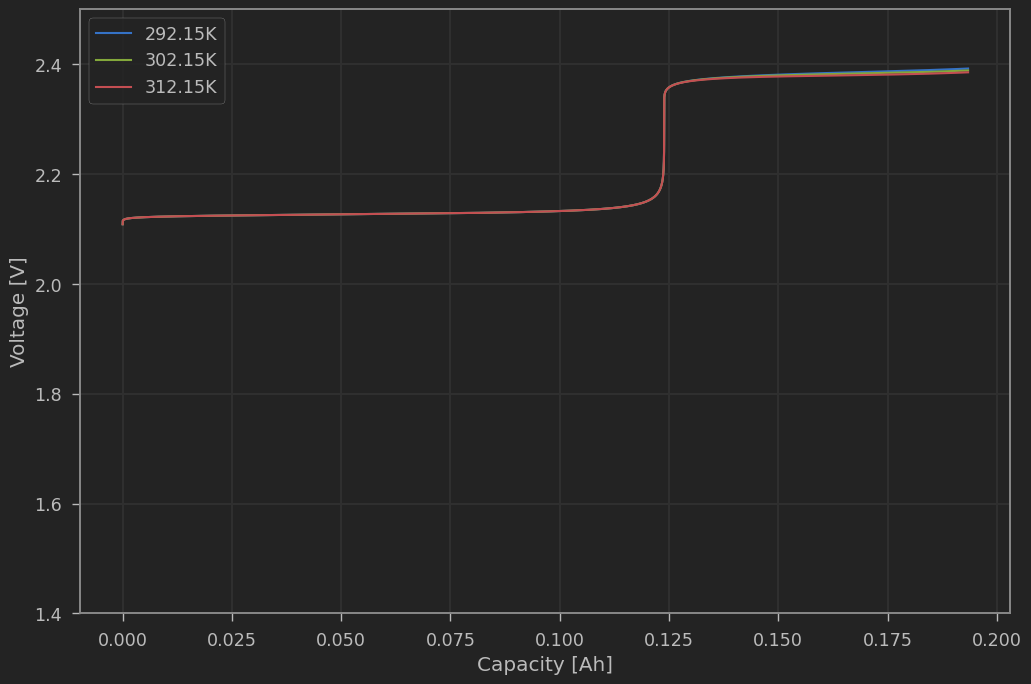

In [134]:
plt.rcParams['figure.figsize'] = [12, 8]
voltage_cornish_charge_292 = sim_cornish_charge_292.solution['Terminal voltage [V]'].entries
capacity_cornish_charge_292 = abs(current)*sim_cornish_charge_292.solution.t/3600
plt.plot(capacity_cornish_charge_292,voltage_cornish_charge_292)

voltage_cornish_charge_302 = sim_cornish_charge_302.solution['Terminal voltage [V]'].entries
capacity_cornish_charge_302 = abs(current)*sim_cornish_charge_302.solution.t/3600
plt.plot(capacity_cornish_charge_302,voltage_cornish_charge_302)

voltage_cornish_charge_312 = sim_cornish_charge_312.solution['Terminal voltage [V]'].entries
capacity_cornish_charge_312 = abs(current)*sim_cornish_charge_312.solution.t/3600
plt.plot(capacity_cornish_charge_312,voltage_cornish_charge_312)

plt.ylim([1.4,2.5])
plt.legend(["292.15K", "302.15K","312.15K"])
plt.xlabel("Capacity [Ah]")
plt.ylabel("Voltage [V]")
plt.grid(True)
notify

In [ ]:
S6 = sim_hunt_S6_2_current.solution['S6 [g]'].entries
S4 = sim_hunt_S6_2_current.solution['S4 [g]'].entries
S2 = sim_hunt_S6_2_current.solution['S2 [g]'].entries
S1 = sim_hunt_S6_2_current.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
plt.plot(abs(current)*sim_hunt_S6_2_current.solution.t/3600,1/(1.1- (Li/max(Li))))

S6 = sim_hunt_S6_3_current.solution['S6 [g]'].entries
S4 = sim_hunt_S6_3_current.solution['S4 [g]'].entries
S2 = sim_hunt_S6_3_current.solution['S2 [g]'].entries
S1 = sim_hunt_S6_3_current.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
plt.plot(abs(current)*sim_hunt_S6_3_current.solution.t/3600,1/(1.1- (Li/max(Li))))

#S6 = sim_hunt_OG.solution['S6 [g]'].entries
S4 = sim_hunt_OG.solution['S4 [g]'].entries
S2 = sim_hunt_OG.solution['S2 [g]'].entries
S1 = sim_hunt_OG.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4
plt.plot(abs(current)*sim_hunt_OG.solution.t/3600,1/(1.1- (Li/max(Li))))

S4 = sim_hunt_3_current.solution['S4 [g]'].entries
S2 = sim_hunt_3_current.solution['S2 [g]'].entries
S1 = sim_hunt_3_current.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4
plt.plot(abs(current)*sim_hunt_3_current.solution.t/3600,1/(1.1- (Li/max(Li))))

plt.legend(['S6, 2, EH0/ELO = 2.38/2.0',
            'S6, 3, EH0/EM0/ELO = 2.35/2.33/2.0',
            'Original, EH0/EL0 = 2.3/2.15',
            '3 current EH0/EL0 = 2.38/2.1',
            'Experiment 30 Degrees C'])


plt.xlabel('Capacity [Ah]')
plt.ylabel('Proportional to Li Concentration')
plt.title('Various Models with Hunt Experiment Specifications')
plt.grid(True)

In [ ]:
# Let's see how that kink in the resistance is effected by various parameters. Can we smooth it out to look more like the data?
model = pybamm.lithium_sulfur.MarinescuEtAl2016_3_current()
current = 2*0.0211
hours = 15
time_in_seconds = 21000#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        #"Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[2] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[3],
        "Initial Condition for S ion [g]": discharge_initial_data[4],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[5],
        "Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.15,
        "Standard Potential L [V]": 2.1,
        "Standard Potential H [V]": 2.38,
        "Exchange current density L [A.m-2]": 4.9,
        "Exchange current density H [A.m-2]": 5,
        #"Ambient Temperature [K]" : 302
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_3_current = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_3_current.solve(np.linspace(0, time_in_seconds, 10000))

In [ ]:
S4 = sim_hunt_3_current.solution['S4 [g]'].entries
S2 = sim_hunt_3_current.solution['S2 [g]'].entries
S1 = sim_hunt_3_current.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4
plt.plot(abs(current)*sim_hunt_3_current.solution.t/3600,1/(1.1- (Li/max(Li))))
notify

In [ ]:
capacity =abs(current)*sim_hunt_3_current.solution.t/3600
plt.plot(capacity, S1)
plt.plot(capacity, S2)
plt.plot(capacity, S4)
plt.legend(['S1','S2','S4'])

In [1]:
x = np.where(voltage_cornish_pseudospatial <= 2.4)
loc = x[0][0]
S8_initial_cornish = sim_cornish_pseudospatial_quick.solution['S8 [g]'].entries[loc]
S6_initial_cornish = sim_cornish_pseudospatial_quick.solution['S6 [g]'].entries[loc]
S4_initial_cornish = sim_cornish_pseudospatial_quick.solution['S4 [g]'].entries[loc]
S2_initial_cornish = sim_cornish_pseudospatial_quick.solution['S2 [g]'].entries[loc]
S_initial_cornish = sim_cornish_pseudospatial_quick.solution['S [g]'].entries[loc]
Sp_initial_cornish = sim_cornish_pseudospatial_quick.solution["Precipitated Sulfur [g]"].entries[loc]
V_initial_cornish = sim_cornish_pseudospatial_quick.solution['Terminal voltage [V]'].entries[loc]

NameError: name 'np' is not defined